In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [28]:
rho = 0.85
h = 0.016
m = 48
T = 1
M = 6 # cube root of number of unit cells in the L^3 volume, gives N=864 particles
L = np.cbrt((4*M**3)/rho)
sigma = 3.405 #Angstrom
epsilon = 119.8 #K

tp = h #*

In [29]:
path_r_0 = "C:/Users/corin/CLionProjects/Computational-physics/r_total_T05.txt"
path_v_0 = "C:/Users/corin/CLionProjects/Computational-physics/v_total_T05.txt"
path_b_0 = "C:/Users/corin/CLionProjects/Computational-physics/bins_05.txt"

#path_r_2 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T3.txt"
#path_v_2 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T3.txt"
#path_b_2 = "C:/Users/corin/CLionProjects/Computational-physics/bins_3.txt"

path_r_1 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T08.txt"
path_v_1 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T08.txt"
path_b_1 = "C:/Users/corin/CLionProjects/Computational-physics/bins_08.txt"

r_total = np.loadtxt(path_r_0, delimiter=",")
v_total = np.loadtxt(path_v_0, delimiter=",")

#r_total_2 = np.loadtxt(path_r_2, delimiter=",")
#v_total_2 = np.loadtxt(path_v_2, delimiter=",")

r_total_1 = np.loadtxt(path_r_1, delimiter=",")
v_total_1 = np.loadtxt(path_v_1, delimiter=",")

bins_05 = np.loadtxt(path_b_0, delimiter=",")
bins_1 = np.loadtxt(path_b_1, delimiter=",")

print(bins_05.shape)
print(bins_1.shape)

(50,)
(50,)


In [30]:
num_timesteps = 1498

r_total_cut = r_total[:864*num_timesteps - r_total.shape[0], :]
v_total_cut = v_total[:864*num_timesteps - v_total.shape[0], :]
r_total_reshaped = r_total_cut.reshape((num_timesteps, 864, 3))
v_total_reshaped = v_total_cut.reshape((num_timesteps, 864, 3))

#r_total_2_cut = r_total_2[:864*num_timesteps - r_total_2.shape[0], :]
#v_total_2_cut = v_total_2[:864*num_timesteps - v_total_2.shape[0], :]
#r_total_2_reshaped = r_total_2_cut.reshape((num_timesteps, 864, 3))
#v_total_2_reshaped = v_total_2_cut.reshape((num_timesteps, 864, 3))

r_total_1_cut = r_total_1[:864*num_timesteps - r_total_1.shape[0], :]
v_total_1_cut = v_total_1[:864*num_timesteps - v_total_1.shape[0], :]
r_total_1_reshaped = r_total_1_cut.reshape((num_timesteps, 864, 3))
v_total_1_reshaped = v_total_1_cut.reshape((num_timesteps, 864, 3))

In [31]:
#np.savetxt("rij_T2_x.txt", np.array(list_rij_T2), delimiter=", ")
#np.savetxt("rij_T0_x.txt", np.array(list_rij_T0), delimiter=", ")
#np.savetxt("rij_T2_x.txt", np.array(list_rij_T2), delimiter=", ")

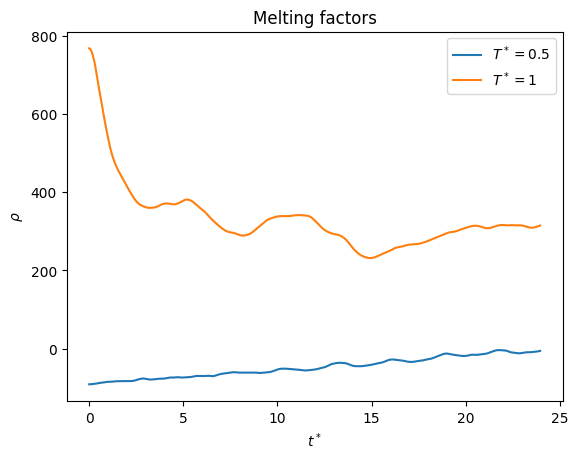

In [32]:
def melting_factor(x):
    """
    :param x: 1D array of shape (num_particles,), positions of all particles' x-positions at a certain time step
    :return: float, melting factor for the configuration
    """
    a = L/M
    k = 4*np.pi/a
    return np.sum([np.cos(k*i) for i in x])

melting_factors_0 = [melting_factor(r_total_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]
melting_factors_1 = [melting_factor(r_total_1_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]
#melting_factors_2 = [melting_factor(r_total_2_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]

plt.plot(np.arange(num_timesteps)*tp, melting_factors_0, label="$T^* = 0.5$")
plt.plot(np.arange(num_timesteps)*tp, melting_factors_1, label="$T^* = 1$")
#plt.plot(np.arange(num_timesteps)*tp, melting_factors_2, label="$T^* = 3$")

plt.title("Melting factors")
plt.xlabel("$t^*$")
plt.ylabel(r"$\rho$")
plt.legend()

In [33]:
#r_total_2_reshaped[-1].shape

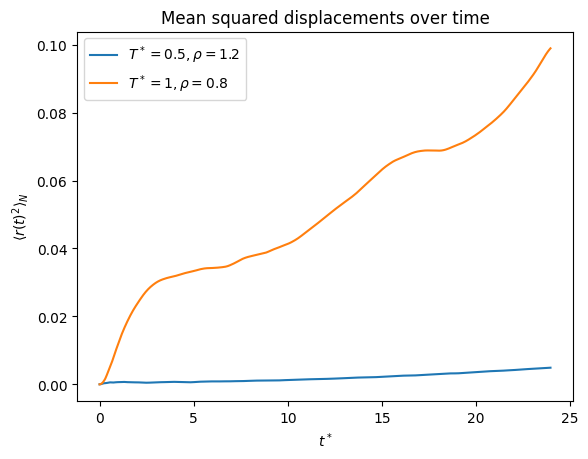

In [48]:
def mean_squared_difference(list_r, list_r_0):
    list_diff = list_r - list_r_0
    list_total_diff = [[delta_r[dim]**2 for dim in range(3)] for delta_r in list_diff]
    return np.mean(list_total_diff)


list_msd_1 = [mean_squared_difference(r_total_1_reshaped[t], r_total_1_reshaped[0]) for t in range(num_timesteps)]
list_msd_0 = [mean_squared_difference(r_total_reshaped[t], r_total_reshaped[0]) for t in range(num_timesteps)]

plt.plot(np.arange(num_timesteps)*tp, list_msd_0, label=r"$T^* = 0.5, \rho = 1.2$")
plt.plot(np.arange(num_timesteps)*tp, list_msd_1, label=r"$T^* = 1, \rho = 0.8$")
#plt.plot(np.arange(num_timesteps)*tp, melting_factors_2, label="$T^* = 3$")

plt.title("Mean squared displacements over time")
plt.xlabel("$t^*$")
plt.ylabel(r"$\langle r(t)^{2}\rangle_{N}$")
plt.legend()

C:\Users\corin\AppData\Local\Temp\ipykernel_4560\2401990123.py:11: RuntimeWarning: invalid value encountered in scalar divide
  plt.stairs([bins_05[k]/(1.2*num_div*(k*0.05)**2) for k in range(50)], bins, label=r"$T^* = 0.5, \rho = 1.2$")
C:\Users\corin\AppData\Local\Temp\ipykernel_4560\2401990123.py:12: RuntimeWarning: invalid value encountered in scalar divide
  plt.stairs([bins_1[k]/(0.8*num_div*(k*0.05)**2) for k in range(50)], bins, label=r"$T^* = 1, \rho = 0.8$")


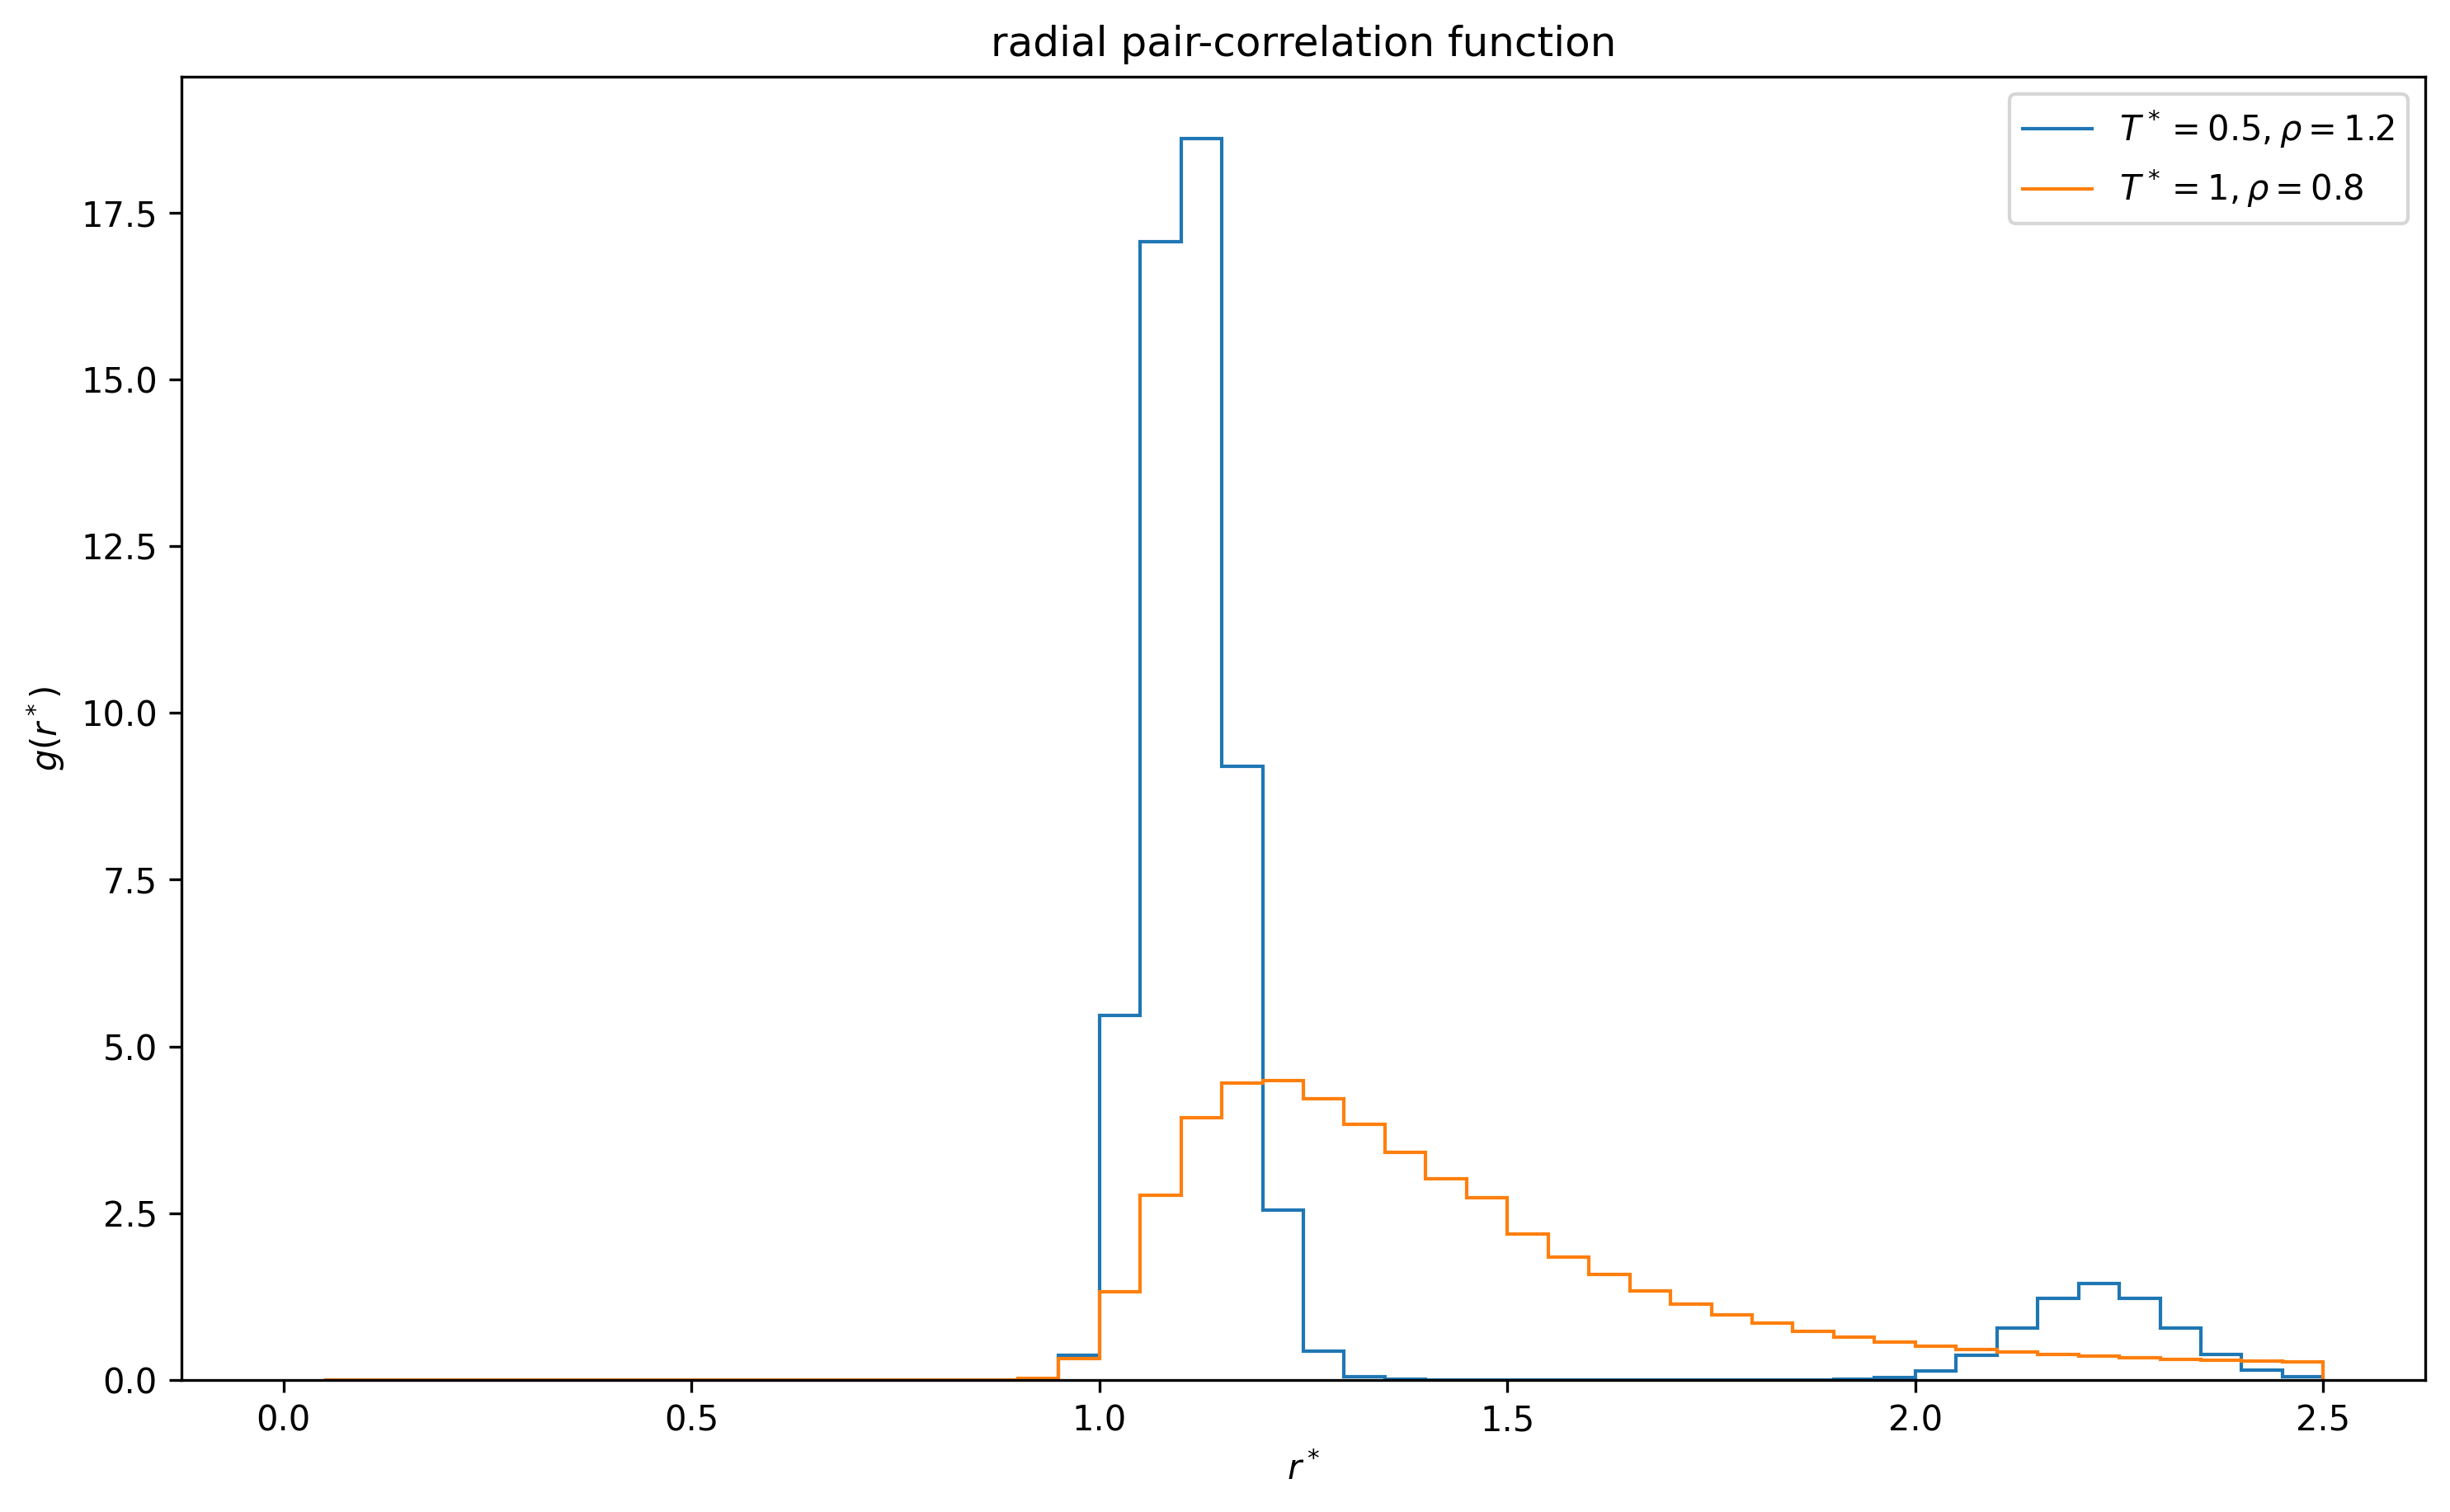

In [47]:
bin_width = 0.05
min_r = 0.0
max_r = 2.5

num_bins = 51
bins = np.arange(num_bins)*0.05

num_div = 1498*864*4*np.pi*0.05

fig = plt.figure(figsize=(10, 6), dpi=300)
plt.stairs([bins_05[k]/(1.2*num_div*(k*0.05)**2) for k in range(50)], bins, label=r"$T^* = 0.5, \rho = 1.2$")
plt.stairs([bins_1[k]/(0.8*num_div*(k*0.05)**2) for k in range(50)], bins, label=r"$T^* = 1, \rho = 0.8$")
plt.xlabel("$r^*$")
plt.ylabel("$g(r^*)$")
fig.tight_layout()
plt.legend()
plt.title("radial pair-correlation function")
plt.show()

In [43]:
[bins_05[k]/(1.2*num_div*(k*0.05)**2) for k in range(50)]

C:\Users\corin\AppData\Local\Temp\ipykernel_4560\3994122653.py:1: RuntimeWarning: invalid value encountered in scalar divide
  [bins_05[k]/(1.2*num_div*(k*0.05)**2) for k in range(50)]


[nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0023480442803812413,
 0.3729755299523408,
 5.458592814604305,
 17.0676426405906,
 18.61348391911144,
 9.204235737538749,
 2.546069744891254,
 0.4316352152089401,
 0.048755754897751996,
 0.003450095714659793,
 0.00012966087236183357,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00012904122661577943,
 0.0008491337433440864,
 0.006063276536895252,
 0.030770471120758147,
 0.12772553745052573,
 0.3681901795886941,
 0.7811588883461648,
 1.2246352240811518,
 1.4463320839443319,
 1.2181912821159164,
 0.7813587609968872,
 0.38104449896990816,
 0.14326066839791707,
 0.04348137662550305]